Студент Жилкин Федор, 344
# Домашняя работа 4: "Численное дифференцирование."
**Задания:**
1. Вычислить приближенно значения:
    1. Первой производной функции $f(x)$ с порядком погрещности $O(h)$ и $O(h^2)$
    2. Второй производной функции $f(x)$ с порядком погрещности $O(h^2)$
    
1. Построить полиномы заданного порядка, вывести необходимые таблицы
2. Выполнить обратное интерполирование, считая, что у данной функции нет обратной, для этого построить многочлен нужной степени и, прировняв к заданному значению, найти корень уравнения

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import pandas as pd

In [146]:
x = Symbol('x')
y = exp(2*x)
y

exp(2*x)

In [144]:
def F(x):
    return np.exp(2*x)

In [51]:
def args_values_arrays(xl, xr, h=0.1):
    x = xl
    values = []
    args = []
    while x <= xr:
        args.append(np.round(x, 1))
        values.append(np.round(F(x), 5))
        x += h
    return args, values

In [52]:
args, values = args_values_arrays(0, 1)

In [163]:
def dfdx(f, ord_):
    for i in range(ord_):
        # print(i)
        y = diff(f)
        f = y
    return lambdify(x, y, 'numpy')

In [164]:
g = dfdx(y, 1)
g(0)

2.0

In [165]:
range(1)

range(0, 1)

In [248]:
def calculate_diffs(args=args, values=values, h=0.1):
    i = 1
    accurate_diffs_1 = []
    accurate_diffs_2 = []
    diffs_1_h1 = [round((values[1] - values[0]) / h, 4)]
    diffs_1_h2 = [round((-3*values[0] + 4*values[1] - values[2])/ (2*h), 4),
                  round((-3*values[1] + 4*values[2] - values[3])/ (2*h), 4)]
    diffs_2_h2 = [nan]
    
    g1 = dfdx(y, 1)
    g2 = dfdx(y, 2)
    for arg in args:
        accurate_diffs_1.append(round(g1(arg), 4))
        accurate_diffs_2.append(round(g2(arg), 4))
    while i < len(values):
        diffs_1_h1.append(round((values[i] - values[i-1]) / h, 4))
        if i > 1:
            diffs_1_h2.append(round((3*values[i] - 4*values[i-1] + values[i-2])/ (2*h), 4))
        if i < len(values) - 1:
            diffs_2_h2.append(round((values[i+1] - 2*values[i] + values[i-1])/ (h**2),4))
        i += 1
    diffs_2_h2.append(nan)
    return accurate_diffs_1, accurate_diffs_2, diffs_1_h1, diffs_1_h2, diffs_2_h2

In [253]:
diffs = list(calculate_diffs())

In [322]:
def fill_table(args, values, diffs, func='f(x)'):
    a = {}
    a['x'] = args
    a[func] = values
    a['''f'(x) '''] = diffs[0]
    a['''f'(x) + O(h) '''] = diffs[2]
    a['''O(h) '''] = [x - y for x, y in zip(diffs[0], diffs[2])]
    a['''f'(x) + O(h2) '''] = diffs[3]
    a['''O(h2) '''] = [x - y for x, y in zip(diffs[0], diffs[3])]  
    a['''f''(x) '''] = diffs[1]
    a['''f''(x) + O(h2)'''] = diffs[4]
    a['''O(h2) 2'''] = [x - y for x, y in zip(diffs[1], diffs[4])]  
    
    df = pd.DataFrame.from_dict(a, orient='index')
    df = df.transpose() 
    
    a.pop('x')
    a.pop('''O(h) ''')
    a.pop(func)
    a.pop('''O(h2) ''')
    a.pop('''f''(x) ''')
    a.pop('''f''(x) + O(h2)''')
    a.pop('''O(h2) 2''')
    
    df1 = pd.DataFrame.from_dict(a, orient='index')
    df1 = df1.transpose()    
   
    df1.plot(figsize=(20,8))
    
    return df.style.hide_index()

x,f(x),f'(x),f'(x) + O(h),O(h),f'(x) + O(h2),O(h2),f''(x),f''(x) + O(h2),O(h2) 2
0,1,2,2.214,-0.214,1.9689,0.0311,4,nan,nan
0.1,1.2214,2.4428,2.214,0.2288,2.4048,0.038,4.8856,4.902,-0.0164
0.2,1.49182,2.9836,2.7042,0.2794,2.9493,0.0343,5.9673,5.988,-0.0207
0.3,1.82212,3.6442,3.303,0.3412,3.6024,0.0418,7.2885,7.312,-0.0235
0.4,2.22554,4.4511,4.0342,0.4169,4.3998,0.0513,8.9022,8.932,-0.0298
0.5,2.71828,5.4366,4.9274,0.5092,5.374,0.0626,10.8731,10.91,-0.0369
0.6,3.32012,6.6402,6.0184,0.6218,6.5639,0.0763,13.2805,13.324,-0.0435
0.7,4.0552,8.1104,7.3508,0.7596,8.017,0.0934,16.2208,16.275,-0.0542
0.8,4.95303,9.9061,8.9783,0.9278,9.792,0.1141,19.8121,19.879,-0.0669
0.9,6.04965,12.0993,10.9662,1.1331,11.9601,0.1392,24.1986,24.279,-0.0804


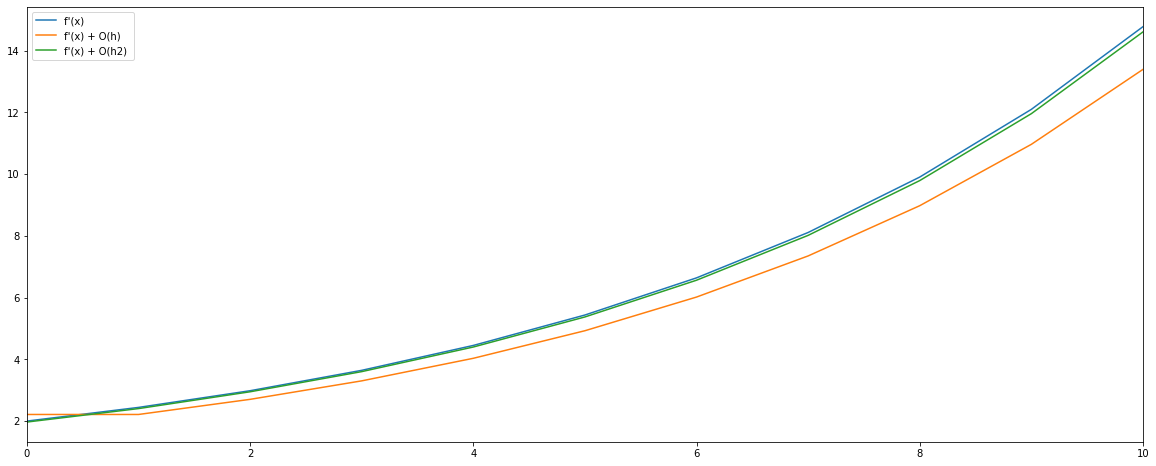

In [323]:
fill_table(args, values, diffs)